**Kaggle team name**: _ _ _ _ _ _ _ _ _
1. Format: `🐧[BB Team#]-[Your fancy Kaggle group name]-[Students' names]`.
  1. Eg. `🐧A-Heros-Fleischer,Melnikov`, where `🐧` identifies JHU and `A` identifies the Canvas group code

Your private LB score must be reproducible with this Colab. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation). Don't exceed runtime quota.

<small><hr style="margin:0;background-color:silver"><font color=gray>Notebook author: <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Oleg Melnikov</a>, ©<a href="https://apps.ep.jhu.edu/course-homepages/3765-605-742-deep-neural-networks" target="_blank">JHU</a> 2021 onwards</font></small>

<hr color=red>

# **🏆🪐Venus vs Mars**


<details><summary><font color=darkblue>More info and Kaggle API instructions</font></summary>

[Kaggle competition URL](https://www.kaggle.com/competitions/32822venus-vs-mars/rules). See competition rules, submission, grading, dataset, and performance metric. The **starter code** below produces a baseline model, which you should beat, while respecting the competition rules. Your code starts after the timer. This is your baseline model. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation) for reproducibility!

**Instructions for enabling Kaggle API in Colab**:
1. Accept competition rules before running [Kaggle API](https://github.com/Kaggle/kaggle-api#api-credentials). [Loading Kaggle dataset example](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab)
1. In your Kaggle Account, [Create API Token](https://github.com/Kaggle/kaggle-api#api-credentials) and save the resulting **kaggle.json** file to the [root of your Google Drive](https://drive.google.com/drive/u/0/my-drive)
2. In Colab, open **Files** panel 🗀 (on the left) and click gray folder icon <font color=gray>🖿</font> to mount your Google drive

Your Kaggle/Google Drive credentials are secure; and Colab's kaggle.json only lasts a Colab session.

</details>

## **Starter code (do not modify)**

In [ ]:
from google.colab import drive; drive.mount('/content/drive')   # OK to enable, if kaggle.json is stored in Google Drive

Mounted at /content/drive


In [ ]:
!pip -q install tensorflow==2.7
!apt -q install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2
!pip -q install -U tfds-nightly tensorflow_addons tensorflow > log

     |████████████████████████████████| 665.5 MB 24 kB/s 
     |████████████████████████████████| 463 kB 19.0 MB/s 
     |████████████████████████████████| 1.3 MB 59.1 MB/s 
Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 17 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (63.3 MB/s)
(Reading database ... 155680 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading datab

In [ ]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                               # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
!cp kaggle.json ~/.kaggle/kaggle.json > log       # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                  # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v 32822venus-vs-mars # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log              # download competition dataset as a zip file
!unzip -o *.zip >> log                            # Kaggle dataset is copied as a single file and needs to be unzipped.
!kaggle competitions leaderboard --show           # print public leaderboard

cp: cannot stat 'kaggle.json': No such file or directory
- competition is now set to: 32822venus-vs-mars
100% 35.0M/35.0M [00:00<00:00, 79.0MB/s]
Using competition: 32822venus-vs-mars
 teamId  teamName                                submissionDate       score    
-------  --------------------------------------  -------------------  -------  
8964699  Mauricio Acosta                         2022-08-07 21:56:54  0.97080  
8967073  David Na                                2022-08-07 21:23:41  0.96440  
8988896  Naveen Sahi                             2022-08-07 19:44:55  0.96400  
8453323  JC-Hokies-Rumman, Hogge                 2022-04-11 00:54:33  0.96360  
8943901  🐧4-GenderNeutral-Cahill,Rivas           2022-08-07 21:46:29  0.96280  
8973072  AntoineN1                               2022-08-07 05:07:26  0.96040  
8419771  JF-NeptuneVsPluto-Khan,Givre            2022-04-10 21:00:40  0.95960  
8934198  JeffKing                                2022-08-01 09:38:38  0.95920  
8423975  JG-TwoJ

See [more](https://nvidia.custhelp.com/app/answers/detail/a_id/3751/~/useful-nvidia-smi-queries) about NVIDIA GPU stats. Test your code in (free) Colab. It uses Tesla K80 GPU.

In [ ]:
!nvidia-smi --query-gpu=gpu_name,memory.total,memory.free,memory.used --format=csv

name, memory.total [MiB], memory.free [MiB], memory.used [MiB]
Tesla T4, 15109 MiB, 15109 MiB, 0 MiB


In [ ]:
%%time
%%capture
%reset -f
!pip -q install -U tensorflow_addons plotly > log   # update tfa in case students need to use it
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'  # causes an error   https://github.com/tensorflow/tensorflow/issues/38197
import tensorflow_addons as tfa, tensorflow as tf, tensorflow.keras as keras, tensorflow_datasets as tfds
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.applications import resnet50, xception, mobilenet, mobilenet_v2, mobilenet_v3
from tensorflow.keras.utils import image_dataset_from_directory as idfd
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60*5): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=5, suppress=True)
pd.set_option('max_columns', 20, 'precision', 2, 'display.max_rows', 4)
tDIR, sDIR = 'train/', 'test/'

CPU times: user 3.11 s, sys: 375 ms, total: 3.48 s
Wall time: 44 s


Examples of images from female class

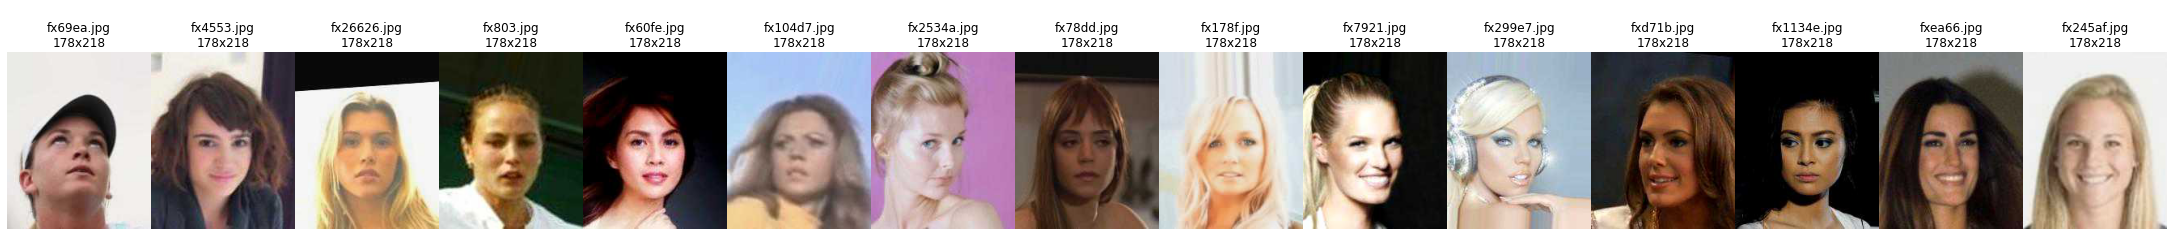

In [ ]:
n, fig = 15, plt.figure(figsize=(30,10));
for i, f in enumerate(np.random.RandomState(0).choice(os.listdir(tDIR+'female/'), n)):
  ax = plt.subplot(1, n, i + 1)
  img = keras.preprocessing.image.load_img(tDIR+'female/'+f);
  _ = ax.set_title(f'\n{f}\n{img.size[0]}x{img.size[1]}');
  _ = plt.axis('off');   _ = plt.tight_layout(pad=0);   _ = plt.imshow(img);

Examples of images from male class

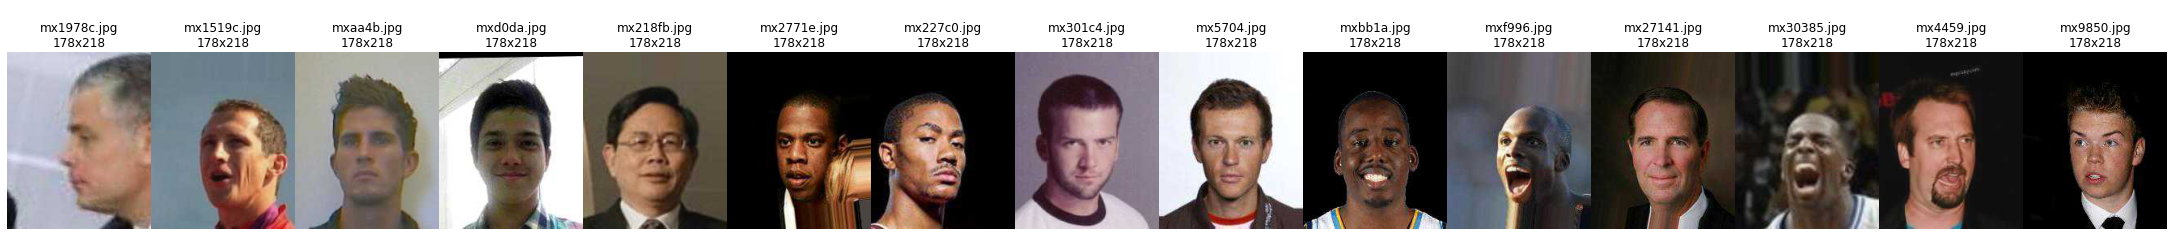

In [ ]:
n, fig = 15, plt.figure(figsize=(30,10));
for i, f in enumerate(np.random.RandomState(0).choice(os.listdir(tDIR+'male/'), n)):
  ax = plt.subplot(1, n, i + 1)
  img = keras.preprocessing.image.load_img(tDIR+'male/'+f);
  _ = ax.set_title(f'\n{f}\n{img.size[0]}x{img.size[1]}');
  _ = plt.axis('off');   _ = plt.tight_layout(pad=0);   _ = plt.imshow(img);

In [ ]:
tmr = Timer() # runtime limit (in seconds). Add all of your code after the timer

⏳ started. You have 300 sec. Good luck!


<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>


## Preprocessing
###What we applied
For this competition we exploited the prefetching and cache transformations with AUTOTUNE on the number of parallel calls on the dataset to efficiently load/train our model. Given that the input images did not match the size requirements of the pretrained model, we resized by using resize_with_crop_or_pad such that the input images were not distorted upon resizing, maintaining the same aspect ratio as the original image. In addition, we used the included preprocessing function from the pretrained model to modify our resized images.
### How did we evaluate effectiveness
The effectiveness of our preprocessing was assessed by evaluating the validation accuracy score, as well as the public leaderboard score ok Kaggle upon submission.
### Ideas that worked/didn't work
We tried augmenting our dataset with various transformations, such as horizontal flip, brightness, and contrast but did not see improvements in our leading accuracy submission. In addition, we tried shuffling at the begining of each epoch by chaining the shuffle() transformation after cache() but this did not significantly improve our results and added more time to our total runtime. Initially we were using the baseline method of simply resizing but upon using the crop/padding technique we saw a significant improvement. We hypothesized that perhaps the brightness/contrast/horizontal flipping would have a similar effect but this was not the case. As such our final preprocessing simply consisted of using the crop/padding resize function as well as applying the pretrained models preprocessing on the input images.
## Modeling
### What we applied
We applied transfer learning using EfficientNetV2B2 neural network with the weights from training on ImageNet. We added a GlobalAveragePooling2D layer and connected to a Dense Layer with a single output for classification. We also included a learning rate scheduler such that the learning rate is halved after each epoch. We se the entire model to be trainable from the first epoch and trained our model for 3 epochs on a batch size of 32, and then retrained our model using the validation data as our training data.
### Reasoning
The reasoning behind training on the validation data at the end was that we noticed that upon training, once the training dataset began to overfit the accuracy was near 100 on the training, such that the changes being propagated to the network were minimally affecting the existing network which was being reflected in the validation accuracy plateauing at a suboptimal score. Thus we reversed the training and validating datasets and let the neural network learn on the validation set. This proved effective since we can see that the accuracy on the new validation dataset (the original training dataset) continued to improve as the network learned from these extra examples. This was also reflected in our public leaderboard score increasing significantly.
### Ideas that worked/didn't work
Some other ideas that we tried was including extra hidden layers, freezing the pretrained weights initially and then unfreezing all/some of the hidden layer weights, different initializers/optimizers, and different learning rate schedules. Initially we found that ResNet50 had favorable scores compared to the baseline mobilenet_v2 model, and this prompted a search of the pretrained models. Using reference 1, which details some performance metrics for various pretrained models, we let this guide us on the exploration of various models, ultimately settling on EfficientNetV2B2.  In the end, simply training the entire model with a single output dense layer with an appropriate learning schedule/learning rate and using the Adam optimizer proved most successful, with the addition of including the validation set in our training of the module.


## **Task 2.1**

**Explain your preprocessing:** i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.

In [ ]:
import random, os
rseed = 1011

def set_rand_seed():
  random.seed(rseed)
  tf.random.set_seed(rseed)   # always seed your experiments
  np.random.seed(rseed)
  os.environ['PYTHONHASHSEED'] = str(rseed)
set_rand_seed()
tf.random.set_seed(1)

### Model Selection

When selecting our final model, we analyzed many different models for transfer learning. The key points of consideration were: Time to train and performance accuracy. We tested many different models and found the best were either ResNet100+ or EfficientNetV2 B series/ EfficientNetV2S. EfficientNetV2M had the best performance overall; however, it took way to long to run. The same was for the Resnet and V2S model. Although both models could run in acceptable time, there was a problem with additional epochs. After considering all models, we went with the model with best tradeoff. This model was the EfficientNetV2B2.


The table that we used to analyze models follows the performance in the keras documentation. Table provided below.

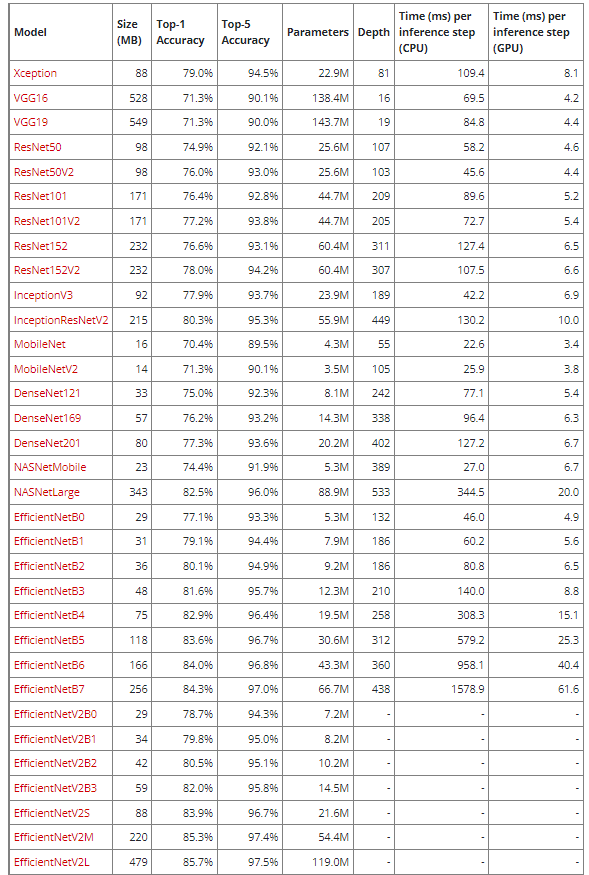

## **Task 2.2**

**Explain your modeling approach:** ideas you tried and why you thought they would be helpful. Takeaway: how these decisions guided you in modeling.

The following cell loads train/validation/test sets as [TF datasets](https://www.tensorflow.org/datasets), `tDS`, `vDS` and `sDS`, respectively.

In [ ]:
# tf.random.set_seed(1)   # always seed your experiments
BS, image_size = 32, (224, 224)  # batch size; image dimensions required by pretrained model
tDS = idfd( tDIR, labels='inferred', label_mode='binary', subset='training', validation_split=0.2,
           class_names=None, color_mode='rgb', batch_size=BS, image_size=image_size, shuffle=True, seed=0).prefetch(buffer_size=tf.data.AUTOTUNE)  # training dataset
vDS = idfd( tDIR, labels='inferred', label_mode='binary', subset='validation', validation_split=0.2,
           class_names=None, color_mode='rgb', batch_size=BS, image_size=image_size, shuffle=True, seed=0).prefetch(buffer_size=tf.data.AUTOTUNE)  # validation dataset
sDS = idfd( sDIR, labels=None, label_mode='binary', subset=None, validation_split=None,
           class_names=None, color_mode='rgb', batch_size=BS, image_size=image_size, shuffle=False, seed=0)           # don't prefetch this testing dataset
print(tf.reduce_sum([tf.reduce_sum(f) for f in list(tDS.take(1))[0][0][:10]])) # to validate seeding of file sampling

Found 5000 files belonging to 2 classes.
Using 4000 files for training.
Found 5000 files belonging to 2 classes.
Using 1000 files for validation.
Found 5000 files belonging to 1 classes.
tf.Tensor(144488860.0, shape=(), dtype=float32)


# Preprocessing
First let's ensure that the images are all of the correct size (224,224) and are conserving the aspect ratio, as well as using the preprocessing inherent to the pretrained model

In [ ]:
#augmentatio_to_a_dataset tf ref
import cv2

def preprocess(image,label=None):
  resized_image=tf.image.resize_with_crop_or_pad(image, 224, 224)

  #image=tf.cast(image,tf.float32)
  final_image=keras.applications.efficientnet_v2.preprocess_input(resized_image)
  # final_image = tf.image.rgb_to_hsv(final_image)

  #image=image/255.0
  return final_image,label

<!-- ## Augmentation
Lets augment our training data to  -->

In [ ]:
tDS=tDS.map(preprocess,num_parallel_calls=tf.data.AUTOTUNE).cache()

In [ ]:
vDS=vDS.map(preprocess,num_parallel_calls=tf.data.AUTOTUNE).cache()
sDS_pre=sDS.map(preprocess,num_parallel_calls=tf.data.AUTOTUNE)

Text(0.5, 1.0, '1.0')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, '1.0')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, '1.0')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, '0.0')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, '0.0')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, '0.0')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, '0.0')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, '1.0')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, '1.0')

(-0.5, 223.5, 223.5, -0.5)

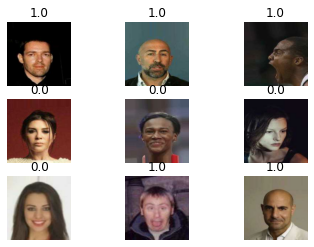

In [ ]:
for images,labels in tDS.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint16'))
    plt.title(labels.numpy()[i][0])
    plt.axis("off")

In [ ]:
def lr_scheduler_decay(epoch, lr):
    # if epoch % 5 == 0 and epoch != 0:
    #   decay = 0.5
    # else:
    #   decay = 1
    decay = 0.5
    return lr * decay

def lr_scheduler_decay_batch(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        decay = 0.5
    else:
        decay = 1
    # decay = 0.97
    return lr * decay

In [ ]:
%%time
keras.backend.clear_session()
set_rand_seed()
tf.random.set_seed(1)   # always seed your experiments
Init = keras.initializers.HeUniform(seed=22) # seed all that you can
InitOutput = keras.initializers.glorot_uniform(seed=22)


pm=keras.applications.efficientnet_v2.EfficientNetV2B2(weights="imagenet",include_top=False, include_preprocessing=True)
avg = GlobalAveragePooling2D(data_format='channels_last')  # collapse spatial dimensions
# hidden1=Dense(250,activation='elu',kernel_initializer=Init)
# batchnorm1 = keras.layers.BatchNormalization()
# hidden2=Dense(250,activation='elu',kernel_initializer=Init)
# batchnorm2 = keras.layers.BatchNormalization()
# hidden3=Dense(250,activation='elu',kernel_initializer=Init)
# batchnorm3 = keras.layers.BatchNormalization()
# hidden4=Dense(250,activation='elu',kernel_initializer=Init)
# batchnorm4 = keras.layers.BatchNormalization()

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler_decay)
lr_decay_callback_batch = tf.keras.callbacks.LearningRateScheduler(lr_scheduler_decay_batch)
es=keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                  min_delta=0.0001,
                                  patience=3,
                                  verbose=0,
                                  restore_best_weights=True)

pm.trainable = True # Allow weights to be trainable
output = Dense(1, activation="sigmoid", kernel_initializer=InitOutput)
pm1 = tf.keras.Sequential([
    pm,
    avg,
    # hidden1,
    # batchnorm1,
    # hidden2,
    # batchnorm2,
    # hidden3,
    # batchnorm3,
    # hidden4,
    # batchnorm4,
    output
])
_=pm1.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.002)#Adam(learning_rate=.001)#SGD(learning_rate=0.01, momentum=0.9, decay=0.01)
pm1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
hist = pm1.fit(tDS, epochs=3, validation_data=vDS,batch_size=32,callbacks=[lr_decay_callback])     # For BS=32, 2xCPU: 15min/epoch, GPU: 15sec/epoch  (60x faster)10
hist2 = pm1.fit(vDS, epochs=5, validation_data=tDS,batch_size=32,callbacks=[lr_decay_callback])

35839040/35839040 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, None, None, 1408)  8769374  
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1409      
                                                                 
Total params: 8,770,783
Trainable params: 8,688,495
Non-trainable params: 82,288
_________________________________________________________________
Epoch 1/3
125/125 [==============================] - 68s 293ms/step - loss: 0.2861 - accuracy: 0.8830 - val_

### Trial model Code

In [ ]:
# for layer in pm1.layers[:151]:
#    layer.trainable = False
# for layer in pm1.layers[151:]:
#    layer.trainable = True

In [ ]:
# %%time
# for l in pm.layers: l.trainable = False                               # freeze layers from training
# optimizer=keras.optimizers.SGD(learning_rate=0.005, momentum=0.9, decay=0.1)
# pm1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# hist = pm1.fit(tDS, epochs=5, validation_data=vDS,batch_size=2000,callbacks=es)      # For BS=32, 2xCPU: 15min/epoch, GPU: 15sec/epoch  (60x faster)

In [ ]:
# for layer in pm1.layers[:145]:
#    layer.trainable = False
# for layer in pm1.layers[145:]:
#    layer.trainable = True

In [ ]:
# # %%time
# pm1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# hist = pm1.fit(tDS, epochs=4, validation_data=vDS,batch_size=32)     # For BS=32, 2xCPU: 15min/epoch, GPU: 15sec/epoch  (60x faster)

In [ ]:
# from functools import partial
# DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
# padding="SAME", use_bias=False)
# class ResidualUnit(keras.layers.Layer):
#   def __init__(self, filters, strides=1, activation="relu", **kwargs):
#     super().__init__(**kwargs)
#     self.activation = keras.activations.get(activation)
#     self.main_layers = [
#       DefaultConv2D(filters, strides=strides),
#       keras.layers.BatchNormalization(),
#       self.activation,
#       DefaultConv2D(filters),
#       keras.layers.BatchNormalization()]
#     self.skip_layers = []
#     if strides > 1:
#       self.skip_layers = [
#       DefaultConv2D(filters, kernel_size=1, strides=strides),
#       keras.layers.BatchNormalization()]
#   def call(self, inputs):
#     Z = inputs
#     for layer in self.main_layers:
#       Z = layer(Z)
#     skip_Z = inputs
#     for layer in self.skip_layers:
#       skip_Z = layer(skip_Z)
#     return self.activation(Z + skip_Z)

# model = keras.models.Sequential()
# model.add(DefaultConv2D(64, kernel_size=7, strides=2,input_shape=[224, 224, 3]))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation("relu"))
# model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
# prev_filters = 64
# for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
#   strides = 1 if filters == prev_filters else 2
#   model.add(ResidualUnit(filters, strides=strides))
#   prev_filters = filters
# model.add(keras.layers.GlobalAvgPool2D())
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(1, activation="sigmoid"))

# model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
#hist = pm1.fit(tDS, epochs=9, validation_data=vDS,batch_size=32,callbacks=es)     # For BS=32, 2xCPU: 15min/epoch, GPU: 15sec/epoch  (60x faster)

# Below is the baseline submission

This is your baseline DNN model. Remember to [seed all your experiments](https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development) for reproducibility. [Status of GPU-Determinism in TF](https://github.com/NVIDIA/framework-determinism/blob/master/tensorflow_status.md).

Below we replace the top layer of the pretrained CNN ([MobileNetV2](https://openaccess.thecvf.com/content_cvpr_2018/papers/Sandler_MobileNetV2_Inverted_Residuals_CVPR_2018_paper.pdf)) and train the new layer only (all remaining pretrained layers are frozen).

In [ ]:
# %%time
# tf.random.set_seed(0)   # always seed your experiments
# Init = keras.initializers.RandomNormal(seed=0) # seed all that you can

# #pm = mobilenet_v2.MobileNetV2(weights="imagenet", include_top=False)         # pretrained Xception model
# avg = GlobalAveragePooling2D(data_format='channels_last')(pm.output)  # collapse spatial dimensions
# output = Dense(1, activation="sigmoid", kernel_initializer=Init)(avg)
# pm1 = keras.Model(inputs=pm.input, outputs=output)
# for l in pm.layers: l.trainable = False                               # freeze layers from training

# optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
# pm1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# hist = pm1.fit(tDS, epochs=2, validation_data=vDS)     # For BS=32, 2xCPU: 15min/epoch, GPU: 15sec/epoch  (60x faster)

Below we post-train all pre-trained layers after unlocking them.

In [ ]:
# %%time
# for l in pm.layers: l.trainable = True      # allow training
# opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.001)
# pm1.compile(loss="binary_crossentropy", optimizer=opt, metrics=['binary_accuracy'])
# hist = pm1.fit(tDS, epochs=2, validation_data=vDS)

# Compiling Predictions

Compile and export predictions:

In [ ]:
vIDs = [f.split('/')[1].split('.')[0] for f in sDS.file_paths]   # parse image IDs from file names
pY = pd.DataFrame(pm1.predict(sDS_pre), index=vIDs, columns=['y'])   # predicted targets
ToCSV((pY>0.5)*1, 'dna-5-verify-t4')

157/157 [==============================] - 12s 75ms/step


In [ ]:
# !kaggle competitions submit -c 32822venus-vs-mars -f dna-5-verify-t4.csv -m "efficientnetv2-b2, crop not resize, ADAM 0.002, train val and train, more epochs"

# **References:**

1. https://keras.io/api/applications/
2. https://www.tensorflow.org/tutorials/images/data_augmentation#apply_the_preprocessing_layers_to_the_datasets
3. https://www.tensorflow.org/api_docs/python/tf/data/Dataset
4. https://www.tensorflow.org/guide/data_performance
5. https://keras.io/api/applications/



<font size=5>⏳</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 278 sec


## 💡**Starter Ideas**

1. Try tuning CNN hyperparameters and architecture
1. Other [pre-trained models](https://www.tensorflow.org/api_docs/python/tf/keras/applications) can be faster or more accurate for the given dataset and/or hardware ([benchmarks](https://datascience.stackexchange.com/a/39211/14094))
1. Transforming images via [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)could be faster
1. Identify poorly predicted train images (with near-boundary confidence) and add their augmented versions
1. Identify poorly predicted test images (with near-boundary confidence) and post-train CNN even more on "similar" train images. Similarity can be done in terms of some of the layer(s) of CNN
1. Do you really need all given images? CNN will train faster on a "meaningful" subsample
1. Try ensembling different pretrained CNNs or only their selected layers
1. Try different learning rate for different layers of pretrained models
1. Try cropping instead of resizing images to the fixed $224\times224$ (faces look more naturally if aspect ratio is respected)
1. Try [TPU](https://en.wikipedia.org/wiki/Tensor_Processing_Unit) in Colab. 😮 See [doc example](https://www.tensorflow.org/guide/tpu). Local images should be loaded with [Python I/O](https://stackoverflow.com/a/63147614/3043335), not TF datasets.